___
# **Jour 4 — Librairie Pandas & Affichage graphique**

| **Objectifs de la journée**
- Lire, écrire et manipuler différents types de fichiers (texte, binaire, JSON, CSV).  
- Organiser et automatiser des traitements en lots sur le système de fichiers.  
- Interagir avec le système via des commandes et arguments (subprocess, argparse).  
- Découvrir les ORMs (Peewee, SQLAlchemy) pour manipuler les bases de données.


| **Plan**

1. Manipulation de fichiers CSV/JSON.  
2. Affichage graphique avec matplotlib
3. Interface graphique avec Streamlit.
5. Projet : traitement de fichiers en lots via une interface graphique.  


Cette journée met l’accent sur l’**automatisation** et la capacité de Python à interagir avec son environnement (fichiers, système, bases de données, workflows).


___
### **1. Manipulation de fichiers CSV/JSON avec ``pandas``**

L’utilisation de **`pandas`** permet de traiter rapidement des données tabulaires ou semi-structurées comme le **CSV** et le **JSON**. C’est un outil central pour l’analyse et l’automatisation de traitements en lots.

| **Bonnes pratiques**

- Vérifier l’encodage (utf-8, latin-1) lors de la lecture/écriture.
- Utiliser index=False lors de l’export pour éviter la colonne d’index par défaut.
- Valider la cohérence des colonnes (noms, types) dès le chargement.

Avec pandas, la manipulation de CSV/JSON devient plus simple et plus puissante que l’usage des bibliothèques standard seules, ce qui en fait un incontournable pour l’automatisation des tâches de traitement de données.

Par la suite, nous utiliserons le jeu de données suivant pour manipuler la bibliothèque pandas :

`https://raw.githubusercontent.com/Quera-fr/Python-Programming/refs/heads/main/data.csv`


In [2]:
# Introduction à pandas : pip install pandas
!pip install pandas

  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

In [5]:
pd.DataFrame([[1, 2],[3,4]], columns=["A", "B"])

,A,B
0,1,2
1,3,4


In [7]:
dict_data = {'A': [1, 2],
             'B' : [3, 4]}
dict_data

pd.DataFrame(dict_data)

,A,B
0,1,3
1,2,4


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Quera-fr/Python-Programming/refs/heads/main/data.csv",
                 sep=',', encoding='utf-8')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [21]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [25]:
df.dropna()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [30]:
df.Work_Experience = df.Work_Experience.fillna(0)

In [32]:
# Répartition de la donnée Gender
df.Gender.value_counts()

Gender
Male      4417
Female    3651
Name: count, dtype: int64

In [34]:
df.Profession.unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [36]:
df.Profession.nunique()

9

In [18]:
# Filtre
df[(df['Gender'] == 'Male') & (df.Age > 22)]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
13,459573,Male,Yes,70,No,Lawyer,NaN,Low,1.0,Cat_6,A
17,461644,Male,No,31,No,Healthcare,1.0,Low,6.0,Cat_6,B
...,...,...,...,...,...,...,...,...,...,...,...
8059,460132,Male,No,39,Yes,Healthcare,3.0,Low,2.0,Cat_6,D
8061,465231,Male,Yes,65,No,Artist,0.0,Average,2.0,Cat_6,C
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D


In [20]:
df[(df['Gender'] == 'Male') & (df.Age > 22)].Work_Experience.mean()

np.float64(2.4842837273991654)

In [44]:
# Selection de colonne 
df[['Age', "Work_Experience"]]

,Age,Work_Experience
0,22,1.0
1,38,0.0
2,67,1.0
3,67,0.0
4,40,0.0
...,...,...
8063,22,0.0
8064,35,3.0
8065,33,1.0
8066,27,1.0


In [40]:
# Grouper par Profession et Gender puis calculer la moyenne des Ages et Work_Experiences :groupby(["Profession", "Gender"])[["Age", "Work_Experience"]].mean()

df.groupby(['Profession', 'Gender'])[["Age", "Work_Experience"]].mean()

Age  Work_Experience
Profession    Gender                            
Artist        Female  46.406430         2.582852
              Male    46.254029         2.386800
Doctor        Female  37.815789         2.190789
              Male    36.757812         2.567708
Engineer      Female  41.509839         2.389982
              Male    42.685714         2.100000
Entertainment Female  39.818182         3.043478
              Male    44.163793         2.306034
Executive     Female  43.593750         1.968750
              Male    51.520282         2.056437
Healthcare    Female  27.475763         2.482944
              Male    26.361290         2.175484
Homemaker     Female  37.113300         5.655172
              Male    41.744186         5.023256
Lawyer        Female  74.905537         1.100977
              Male    75.515823         1.031646
Marketing     Female  36.201220         2.792683
              Male    37.609375         1.593750

In [51]:
df.Age + df.Work_Experience

0       23.0
1       38.0
2       68.0
3       67.0
4       40.0
        ... 
8063    22.0
8064    38.0
8065    34.0
8066    28.0
8067    37.0
Length: 8068, dtype: float64

In [53]:
'Bonjour Tout le monde'.lower()

'bonjour tout le monde'

In [60]:
def data_process(x:str):
    try:
        return x.lower()
    except:
        return x

In [64]:
def data_process(x:str):
    return x.lower()

In [69]:
data_process = lambda x: x.lower()

<function __main__.<lambda>(x)>

In [68]:
data_process("Bonjour")

'bonjour'

In [65]:
df.Gender.apply(lambda x: x.lower())

0         male
1       female
2       female
3         male
4       female
         ...  
8063      male
8064      male
8065    female
8066    female
8067      male
Name: Gender, Length: 8068, dtype: object

In [76]:
df.to_csv('data.csv')

In [77]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [56]:
# Traitement de la donnée par lambda
df.Gender.apply(data_process)

0         male
1       female
2       female
3         male
4       female
         ...  
8063      male
8064      male
8065    female
8066    female
8067      male
Name: Gender, Length: 8068, dtype: object

In [63]:
df.map(data_process)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,male,no,22,no,healthcare,1.0,low,4.0,cat_4,d
1,462643,female,yes,38,yes,engineer,0.0,average,3.0,cat_4,a
2,466315,female,yes,67,yes,engineer,1.0,low,1.0,cat_6,b
3,461735,male,yes,67,yes,lawyer,0.0,high,2.0,cat_6,b
4,462669,female,yes,40,yes,entertainment,0.0,high,6.0,cat_6,a
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,male,no,22,no,NaN,0.0,low,7.0,cat_1,d
8064,464685,male,no,35,no,executive,3.0,low,4.0,cat_4,d
8065,465406,female,no,33,yes,healthcare,1.0,low,1.0,cat_6,d
8066,467299,female,no,27,yes,healthcare,1.0,low,4.0,cat_6,b


In [80]:
df[2:8:2]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


In [83]:
pd.concat([df, df], axis=1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,...,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,Cat_4,...,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,...,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,...,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,...,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,...,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,...,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,...,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,...,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


### **2. Affichage graphique avec matplotlib**

La bibliothèque **`matplotlib`** est la référence en Python pour la visualisation 2D. Elle permet de créer des graphiques simples (courbes, barres, histogrammes, nuages de points) et d’intégrer rapidement une représentation visuelle dans un projet.


| **2. Types de graphiques**
- Courbe simple : ``plt.plot``
- Histogramme : ``plt.hist``
- Nuage de points : ``plt.scatter``
- Diagramme en barres : ``plt.bar``



| **3. Personnalisation**
- Titres et labels (plt.title, plt.xlabel, plt.ylabel)
- Couleurs, styles de ligne, marqueurs (plt.plot(x, y, "r--o"))
- Légende (plt.legend)
- Grilles (plt.grid(True))



| **4. Bonnes pratiques**
- Toujours ajouter des titres, axes, légendes pour la lisibilité.
- Sauvegarder les graphiques avec plt.savefig("figure.png").
- Privilégier des couleurs contrastées et des tailles adaptées.

``matplotlib`` fournit les fondations de la visualisation en Python. Pour des graphiques interactifs et plus complexes, on peut explorer seaborn ou plotly.

In [85]:
pd.__version__

'2.3.3'

In [84]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


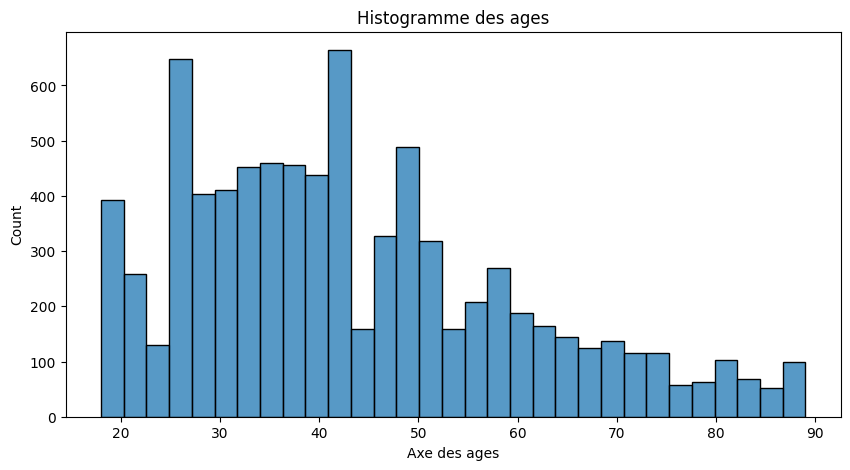

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title('Histogramme des ages')
sns.histplot(df.Age)
plt.xlabel('Axe des ages')
plt.show()

<Axes: xlabel='Profession', ylabel='Age'>

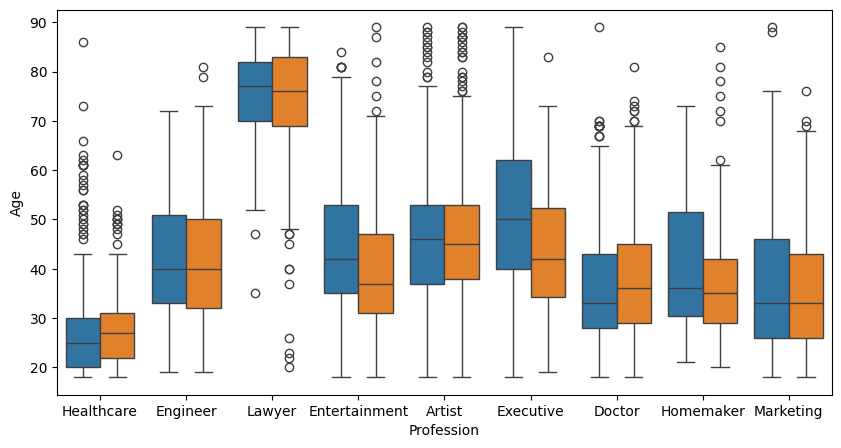

In [111]:
plt.figure(figsize=(10, 5))
sns.boxplot(df, x='Profession', y='Age', hue='Gender',legend=False)

### **3. Interface web : Streamlit**

[Streamlit](https://docs.streamlit.io/develop/api-reference) permet de transformer rapidement du code Python en interface web interactive (filtres, formulaires, graphiques) sans écrire de HTML/CSS. Idéal pour des prototypes, des dashboards data et des petits outils internes.

**Installation & lancement**
```
pip install streamlit
streamlit run app.py
```


---


## Projet — Gestion de base de données avec Streamlit

**Objectif.** Créer une interface CRUD simple en s’appuyant sur votre module **database** (ex: `DatabaseManager`).

**Consignes.**

* Initialiser la base SQLite (création d’une table `users` ou `produits` via le module).
* Pages ou onglets :

  * **Créer** : formulaire d’ajout d'une table.
  * **Lire** : tableau des enregistrements + recherche/filtre.
  * **Mettre à jour** : sélection d’une ligne puis édition.
  * **Supprimer** : Suppression d'une table.
* Intégration directe des méthodes du module (create_table, insert, show_table, drop/update si ajoutée).
* Gestion d’erreurs (exceptions SQL) et messages utilisateur (`st.success`, `st.error`).
* Bonus : export CSV, import CSV, pagination.

**Livrables.**

* `app.py` (Streamlit), votre module `database.py` (ou package), `requirements.txt`, fichier `.db` généré.




In [ ]:
pip install streamlit

In [2]:
import requests

data ={
    'name':'Lucas',
    'age':25,
    'city':'Paris'}

requests.post("http://127.0.0.1:8000/add_user", json=data).text

'{"age":25,"name":"Lucas","city":"Paris"}'